## NBA Bubble Analysis
### By Malick Tobe

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import prebubblestats as prebubble  
import bubblestats as bubble    

In [3]:
def read_excelfile(filename):
    """ Reads an excel file and returns a data frame """ 
    df = pd.read_excel(filename) 
    return df

df = read_excelfile('advanced_stats.xlsx')   

In [4]:
def not_in_bubble(dataframe): 
    """ Filter out the players whose teams were not in the bubble """
    
    teams_not_in_bubble = ["ATL", "CHO", "CHI", "CLE", "DET", "NYK", "GSW", "MIN", "TOT"] 
    
    for i in teams_not_in_bubble:
        dataframe = dataframe[dataframe.Tm != i] 

         
    return dataframe 

df = not_in_bubble(df)

In [5]:
def top_players(dataframe): 
    """ Extract a list of the names of the top performing players 
        during the regular season based on advanced stats """
    
    # get the average number of minutes for a player this season
    # and filter for those players who had more playtime
    avg_mins = df['MP'].sum() // df['Player'].count()
    dataframe = dataframe[(dataframe['MP'] > avg_mins)]  
    
    # get the top players on these advanced stats 
    PER = dataframe.sort_values(by="PER", ascending = False).head(20)
    WS = dataframe.sort_values(by="WS", ascending = False).head(20)
    VORP = dataframe.sort_values(by="VORP", ascending = False).head(20) 
    USG =  dataframe.sort_values(by="USG%", ascending = False).head(20) 
    
    # generate a list of best players without repeating their names
    x = list(PER["Player"]) + list(WS["Player"]) + list(VORP["Player"]) + list(USG["Player"]) 
    top_players_lst = []
    
    for player in x:
        if player not in top_players_lst:
            top_players_lst.append(player) 
             
    return sorted(top_players_lst)  

top_lst = top_players(df)

In [6]:
# The following players will be removed from the list 
# as they were out due to injuries, an error in the NBA's website, and COVID-19 (respectively)  
x = ['Bradley Beal', 'Domantas Sabonis', 'Montrezl Harrell', 'Spencer Dinwiddie'] 

for player in x:
    top_lst.remove(player)

In [7]:
def get_stats(module, list=top_lst):    
    
    headers = ["PLAYER_ID","PLAYER_NAME","TEAM_ID","TEAM_ABBREVIATION","AGE","GP","W","L","W_PCT","MIN","FGM","FGA","FG_PCT","FG3M","FG3A",
           "FG3_PCT","FTM","FTA","FT_PCT","OREB","DREB","REB","AST","TOV","STL","BLK","BLKA","PF","PFD","PTS","PLUS_MINUS","NBA_FANTASY_PTS",
           "DD2","TD3","GP_RANK","W_RANK","L_RANK","W_PCT_RANK","MIN_RANK","FGM_RANK","FGA_RANK","FG_PCT_RANK","FG3M_RANK","FG3A_RANK","FG3_PCT_RANK",
           "FTM_RANK","FTA_RANK","FT_PCT_RANK","OREB_RANK","DREB_RANK","REB_RANK","AST_RANK","TOV_RANK","STL_RANK","BLK_RANK","BLKA_RANK","PF_RANK","PFD_RANK",
           "PTS_RANK","PLUS_MINUS_RANK","NBA_FANTASY_PTS_RANK","DD2_RANK","TD3_RANK","CFID","CFPARAMS"] 
    data = module.data['rowSet'] 
    df = pd.DataFrame(data, columns = headers) 
    df = df.drop(["PLAYER_ID","TEAM_ID","AGE","W","L","W_PCT","FGM","FGA","FG_PCT",
                  "FG3M","FG3A","FG3_PCT","FTM","FTA","FT_PCT","OREB","DREB","BLKA","PF",
                  "PFD","NBA_FANTASY_PTS","DD2","TD3","GP_RANK","W_RANK","L_RANK","W_PCT_RANK",
                  "MIN_RANK","FGM_RANK","FGA_RANK","FG_PCT_RANK","FG3M_RANK","FG3A_RANK",
                  "FG3_PCT_RANK","FTM_RANK","FTA_RANK","FT_PCT_RANK","OREB_RANK","DREB_RANK",
                  "REB_RANK","AST_RANK","TOV_RANK","STL_RANK","BLK_RANK","BLKA_RANK","PF_RANK",
                  "PFD_RANK","PTS_RANK","PLUS_MINUS_RANK","NBA_FANTASY_PTS_RANK","DD2_RANK","TD3_RANK",
                  "CFID","CFPARAMS"], axis=1) 
    df = df.rename(columns={'PLAYER_NAME':'PLAYER', 'TEAM_ABBREVIATION':'TEAM', 'PLUS_MINUS':'+/-'}) 
    df = df[['PLAYER','TEAM','GP','MIN','PTS','AST','REB','STL','BLK','TOV','+/-']]  

    boolean_series = df.PLAYER.isin(list) 
    filtered_df = df[boolean_series]  
    
    index = filtered_df.index 
    filtered_df.index = range(1, len(index)+1)       
    
    return filtered_df 


In [8]:
prebubble_stats = get_stats(prebubble)

In [9]:
bubble_stats = get_stats(bubble) 

In [10]:
def comparison(stat, df1=bubble_stats, df2=prebubble_stats):
    """ Compares the players' statistics before and after the pandemic break """
    
    return np.where(df1['PLAYER'] == df2['PLAYER'], df1[stat] - df2[stat], 0)  

In [11]:
ppg = comparison('PTS') 
apg = comparison('AST')
rpg = comparison('REB')
spg = comparison('STL')
bpg = comparison('BLK')
tpg = comparison('TOV')

compared_data = {'PLAYER': top_lst,
                 'TEAM' : bubble_stats['TEAM'], 
                 'PPG DIFF': ppg,
                 'APG DIFF': apg,
                 'RPG DIFF': rpg, 
                 'SPG DIFF': spg,
                 'BPG DIFF': bpg, 
                 'TPG DIFF': tpg
                } 



difference = pd.DataFrame(compared_data)
difference.index = range(1, 34)  


In [12]:
pre_mean = prebubble_stats.describe()[1:2] 
post_mean = bubble_stats.describe()[1:2]

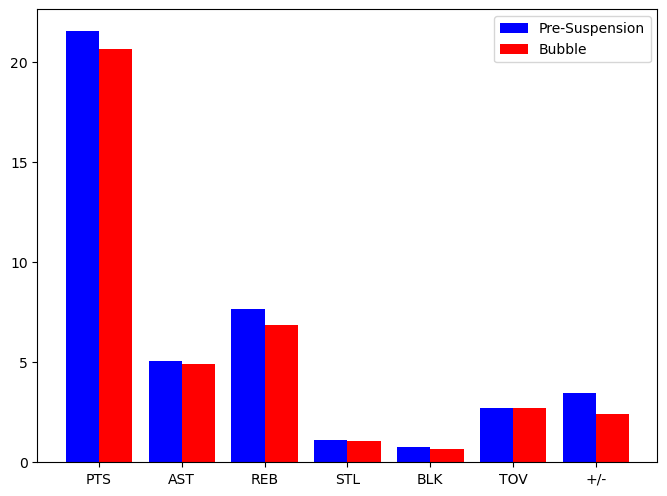

In [22]:
# plot statistics for before and after pandemic break 

N = 7  
idx = np.arange(N)
width = 0.4

plt.figure(figsize=(8,6), dpi=100) 
#plt.title('Average of selected Stats Before the Suspension and During the Bubble')
#plt.xlabel('Statistics')
#plt.ylabel('Average')

plt.bar(idx, pre_mean.loc['mean'][2:], width, color='b', label='Pre-Suspension') 
plt.bar(idx+width, post_mean.loc['mean'][2:], width, color='r', label='Bubble') 
plt.xticks(idx + width / 2, pre_mean.columns[2:])   

plt.legend()
# plt.grid() 
plt.show()  
plt.close() 

In [14]:
# for bubble stats
new = bubble_stats.loc[:, ['PLAYER','PTS','AST','REB','STL','BLK','TOV']]  

piled_lst = list(new)  

new['PILED STATS'] = new[piled_lst].sum(axis=1)  
new['PILED STATS'] = new['PILED STATS'] - (2 * new['TOV']) 

In [15]:
# for prebubble stats 
old = prebubble_stats.loc[:, ['PLAYER','PTS','AST','REB','STL','BLK','TOV']]  

piled_lst1 = list(old)  

old['PILED STATS'] = old[piled_lst1].sum(axis=1)  
old['PILED STATS'] = old['PILED STATS'] - (2 * old['TOV'])  

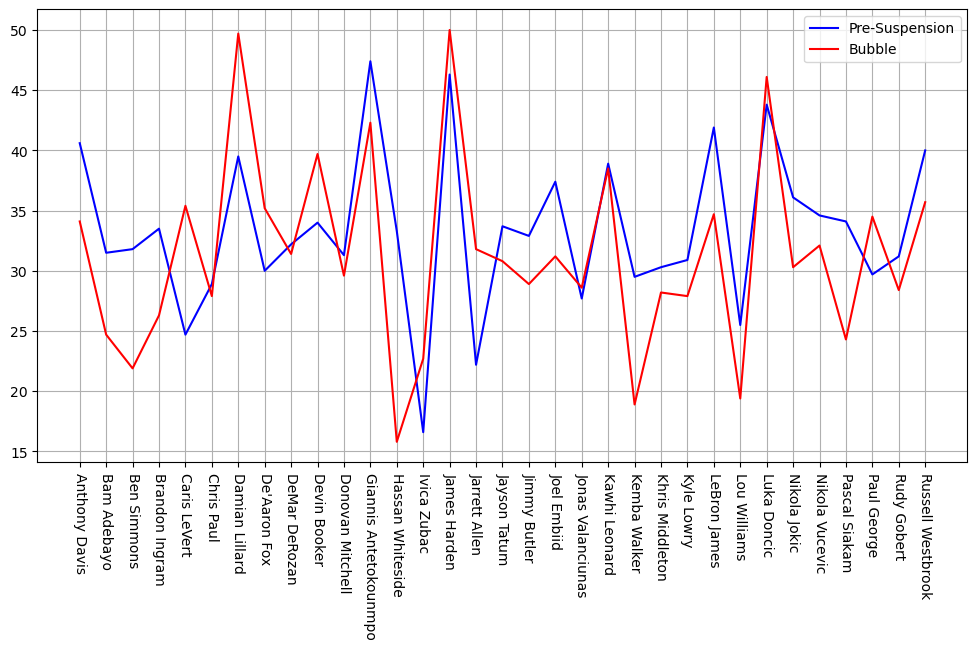

In [24]:
# plot a line graph to see the players' overall performance

plt.figure(figsize=(12,6), dpi=100)
plt.plot(old['PLAYER'], old['PILED STATS'], c='b', label='Pre-Suspension') 
plt.plot(new['PLAYER'], new['PILED STATS'], c='r', label='Bubble') 
#plt.title("Players' Performance")  
#plt.xlabel('Players')
#plt.ylabel('Combined Stats (per game)') # PTS + AST + REB + STL + BLK - TOV
plt.xticks(rotation=270) 
plt.grid()
plt.legend()  

Text(0.5, 1.0, '+/-')

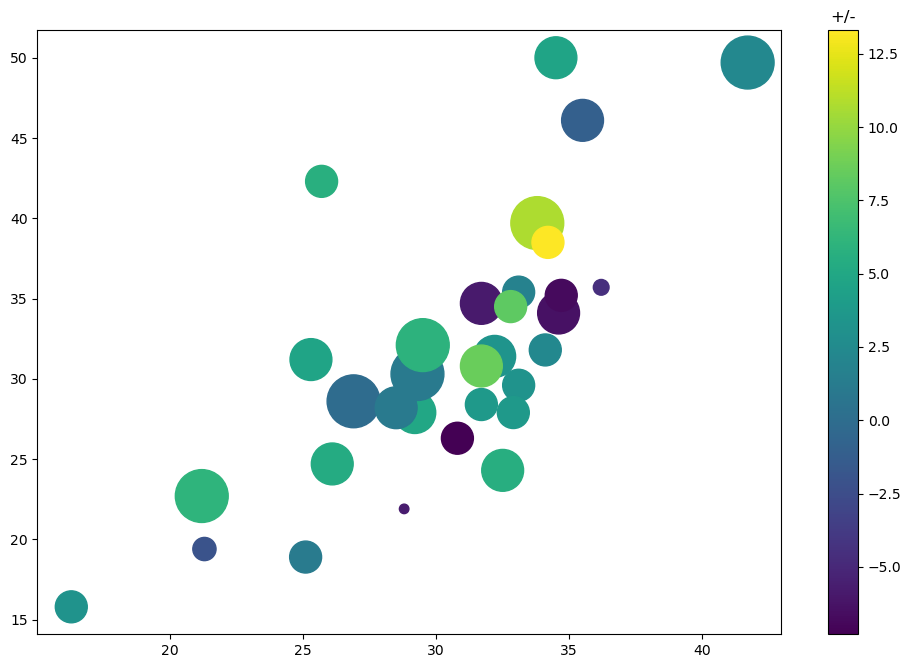

In [25]:
# create a cool scatter plot (bubble only) 

mins = bubble_stats['MIN'] 
games = bubble_stats['GP']
piled = new['PILED STATS']
team = bubble_stats['TEAM'] 
pm = bubble_stats['+/-'] 

plt.figure(figsize=(12,8), dpi=100) 
#plt.title('Correlation Between Minutes Played and Combined Stats')
plt.scatter(mins, piled, s=games**3.5, c=pm)  
#plt.xlabel('Minutes Played (per game)')
#plt.ylabel('Combined Stats (per game)') # PTS + AST + REB + STL + BLK - TOV

clb = plt.colorbar()   
clb.ax.set_title('+/-') 